Parcial Final

Isabella Bedoya Orozco - 1001013873

In [1]:
import numpy as np
import matplotlib.pyplot as plt

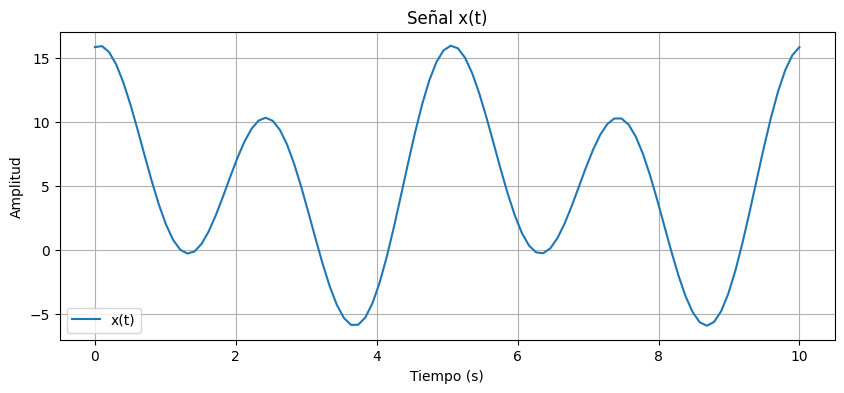

Primeras 10 muestras de la señal:
[15.82842712 15.90731904 15.43892116 14.46691352 13.06459506 11.33000811
  9.37952251  7.34029264  5.34207237  3.50891303]


In [7]:
a = 3
k = 2 * (a + 1)
fs = 10
T = 10
t = np.linspace(0, T, fs * T)  # Vector de tiempo

x_t = 4 * np.sin(40 * np.pi * t + np.pi / 4) + k * np.cos(80 * np.pi * t) + 5

plt.figure(figsize=(10, 4))
plt.plot(t, x_t, label='x(t)')
plt.title('Señal x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

# Mostrar las primeras muestras
print("Primeras 10 muestras de la señal:")
print(x_t[:10])


Periodograma

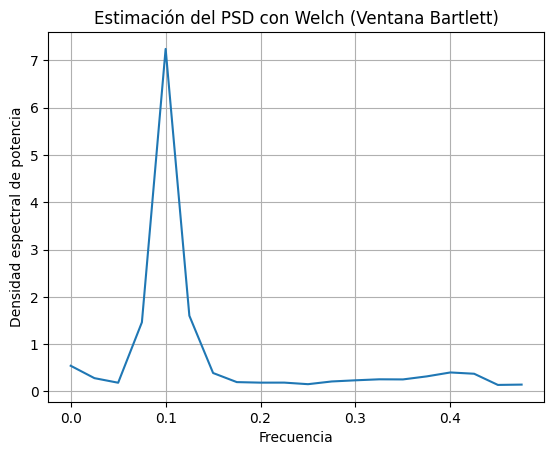

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def welch_periodogram_demo(signal, M, S, window_function):
    N = len(signal)
    K = (N - M) // S + 1


    segments = []
    for k in range(K):
        start = k * S
        end = start + M
        segments.append(signal[start:end])


    periodograms = []
    for segment in segments:
        windowed_segment = segment * window_function
        dft = np.fft.fft(windowed_segment)
        power = (np.abs(dft) ** 2) / sum(window_function ** 2)
        periodograms.append(power)


    periodograms = np.array(periodograms)
    averaged_psd = np.mean(periodograms, axis=0)


    freqs = np.fft.fftfreq(M, d=1.0)[:M // 2]
    psd = averaged_psd[:M // 2]

    return freqs, psd


np.random.seed(0)
signal = np.sin(2 * np.pi * 0.1 * np.arange(0, 200)) + 0.5 * np.random.randn(200)  # Señal ejemplo
M = 40
S = 20
window_function = np.bartlett(M)


freqs, psd = welch_periodogram_demo(signal, M, S, window_function)


plt.plot(freqs, psd)
plt.title("Estimación del PSD con Welch (Ventana Bartlett)")
plt.xlabel("Frecuencia")
plt.ylabel("Densidad espectral de potencia")
plt.grid()
plt.show()



Filtro

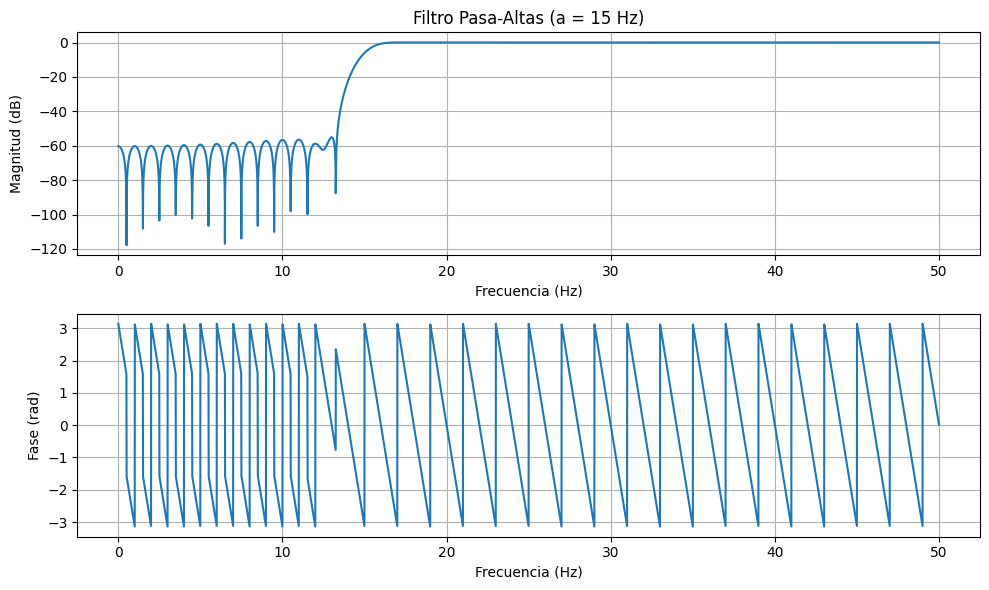

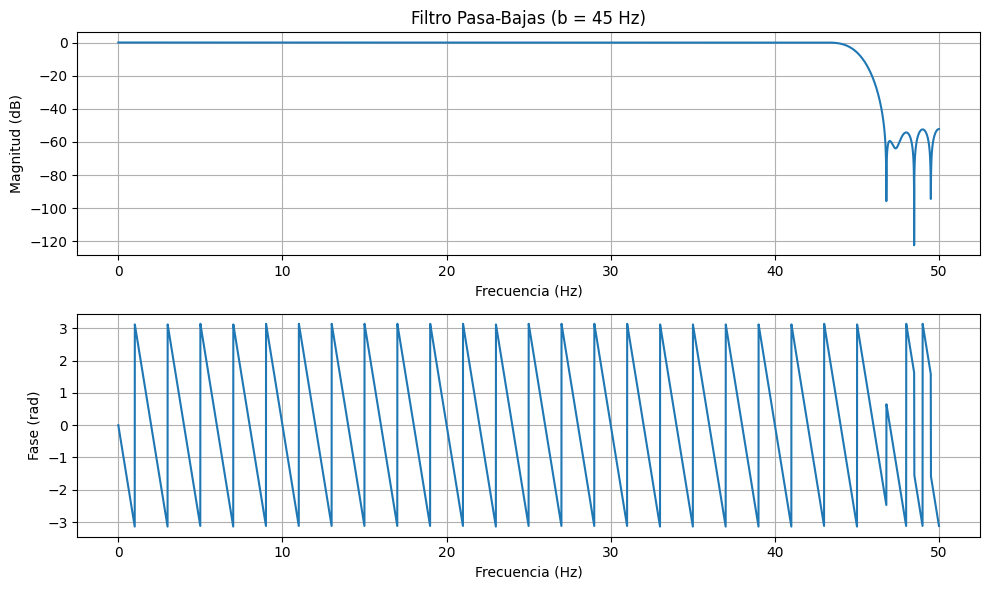

In [10]:
from scipy.signal import firwin, freqz


fs = 100
a = 15
b = 45

attenuation_high = 10
attenuation_low = 100

numtaps_high = 101
cutoff_high = a / (fs / 2)
highpass_filter = firwin(numtaps_high, cutoff_high, pass_zero=False)


numtaps_low = 101
cutoff_low = b / (fs / 2)
lowpass_filter = firwin(numtaps_low, cutoff_low)


w_high, h_high = freqz(highpass_filter, worN=8000, fs=fs)
w_low, h_low = freqz(lowpass_filter, worN=8000, fs=fs)


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w_high, 20 * np.log10(abs(h_high)))
plt.title("Filtro Pasa-Altas (a = 15 Hz)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w_high, np.angle(h_high))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")
plt.grid()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w_low, 20 * np.log10(abs(h_low)))
plt.title("Filtro Pasa-Bajas (b = 45 Hz)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w_low, np.angle(h_low))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")
plt.grid()
plt.tight_layout()
plt.show()
